In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


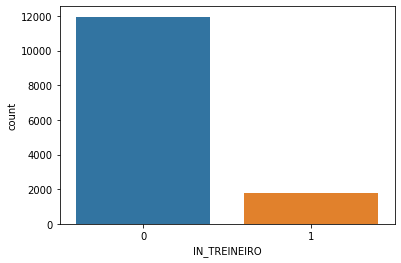

In [5]:
sns.countplot(train['IN_TREINEIRO']);

distribuição do target mal balanceada

In [6]:
test = pd.read_csv('test.csv')
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [7]:
# excluindo as features de treino que não estão no teste
train = pd.concat([train['IN_TREINEIRO'], train[test.columns]],axis=1)

In [8]:
train.shape

(13730, 44)

In [9]:
train.corr()['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_MT            0.092454
TP_PRESENCA_LC            0.092454
TP_COR_RACA               0.009676
TP_STATUS_REDACAO         0.006688
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
NU_NOTA_COMP1            -0.008709
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
NU_NOTA_COMP2            -0.023308
NU_NOTA_COMP5            -0.025811
NU_NOTA_COMP4            -0.025958
NU_NOTA_REDACAO          -0.026328
NU_NOTA_LC               -0.028261
NU_NOTA_COMP3            -0.030147
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
NU_NOTA_CN               -0.037874
NU_NOTA_CH               -0.053460
TP_ESCOLA                -0.244562
TP_ANO_CONCLUIU     

In [10]:
# dropando baixa correlação
train.drop(['Q027','TP_STATUS_REDACAO','TP_DEPENDENCIA_ADM_ESC','TP_ENSINO'],axis=1,inplace=True)

## Dados faltantes

In [11]:
train.isna().sum()

IN_TREINEIRO           0
NU_INSCRICAO           0
CO_UF_RESIDENCIA       0
SG_UF_RESIDENCIA       0
NU_IDADE               0
TP_SEXO                0
TP_COR_RACA            0
TP_NACIONALIDADE       0
TP_ST_CONCLUSAO        0
TP_ANO_CONCLUIU        0
TP_ESCOLA              0
IN_BAIXA_VISAO         0
IN_CEGUEIRA            0
IN_SURDEZ              0
IN_DISLEXIA            0
IN_DISCALCULIA         0
IN_SABATISTA           0
IN_GESTANTE            0
IN_IDOSO               0
TP_PRESENCA_CN         0
TP_PRESENCA_CH         0
TP_PRESENCA_LC         0
TP_PRESENCA_MT         0
NU_NOTA_CN          3389
NU_NOTA_CH          3389
NU_NOTA_LC          3597
TP_LINGUA              0
NU_NOTA_COMP1       3597
NU_NOTA_COMP2       3597
NU_NOTA_COMP3       3597
NU_NOTA_COMP4       3597
NU_NOTA_COMP5       3597
NU_NOTA_REDACAO     3597
Q001                   0
Q002                   0
Q006                   0
Q024                   0
Q025                   0
Q026                   0
Q047                   0


In [13]:
# setando nota zero para os alunos que não estavam presentes nas respectivas provas
train['NU_NOTA_CN'].loc[train.TP_PRESENCA_CN == 0] = 0
train['NU_NOTA_CH'].loc[train.TP_PRESENCA_CH == 0] = 0
train['NU_NOTA_LC'].loc[train.TP_PRESENCA_LC == 0] = 0
# train['NU_NOTA_REDACAO'].loc[train.TP_STATUS_REDACAO ==4] = 0
# train['NU_NOTA_COMP1'].loc[train.TP_STATUS_REDACAO==4] = 0
# train['NU_NOTA_COMP2'].loc[train.TP_STATUS_REDACAO==4] = 0
# train['NU_NOTA_COMP3'].loc[train.TP_STATUS_REDACAO==4] = 0
# train['NU_NOTA_COMP4'].loc[train.TP_STATUS_REDACAO==4] = 0
# train['NU_NOTA_COMP5'].loc[train.TP_STATUS_REDACAO==4] = 0

In [14]:
train.isna().sum()

IN_TREINEIRO           0
NU_INSCRICAO           0
CO_UF_RESIDENCIA       0
SG_UF_RESIDENCIA       0
NU_IDADE               0
TP_SEXO                0
TP_COR_RACA            0
TP_NACIONALIDADE       0
TP_ST_CONCLUSAO        0
TP_ANO_CONCLUIU        0
TP_ESCOLA              0
IN_BAIXA_VISAO         0
IN_CEGUEIRA            0
IN_SURDEZ              0
IN_DISLEXIA            0
IN_DISCALCULIA         0
IN_SABATISTA           0
IN_GESTANTE            0
IN_IDOSO               0
TP_PRESENCA_CN         0
TP_PRESENCA_CH         0
TP_PRESENCA_LC         0
TP_PRESENCA_MT         0
NU_NOTA_CN             9
NU_NOTA_CH             9
NU_NOTA_LC             5
TP_LINGUA              0
NU_NOTA_COMP1       3597
NU_NOTA_COMP2       3597
NU_NOTA_COMP3       3597
NU_NOTA_COMP4       3597
NU_NOTA_COMP5       3597
NU_NOTA_REDACAO     3597
Q001                   0
Q002                   0
Q006                   0
Q024                   0
Q025                   0
Q026                   0
Q047                   0


In [15]:
train = train.fillna(0)

In [17]:
train.corr()['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO        1.000000
TP_ST_CONCLUSAO     0.533983
TP_PRESENCA_CN      0.094692
TP_PRESENCA_CH      0.094692
TP_PRESENCA_LC      0.092454
TP_PRESENCA_MT      0.092454
NU_NOTA_LC          0.083731
NU_NOTA_CN          0.080915
NU_NOTA_COMP1       0.080326
NU_NOTA_CH          0.078276
NU_NOTA_COMP2       0.069545
NU_NOTA_REDACAO     0.069119
NU_NOTA_COMP4       0.068862
NU_NOTA_COMP3       0.064340
NU_NOTA_COMP5       0.045809
TP_COR_RACA         0.009676
IN_SABATISTA        0.003824
IN_DISLEXIA        -0.003297
IN_DISCALCULIA     -0.003297
IN_IDOSO           -0.004663
IN_SURDEZ          -0.007374
IN_GESTANTE        -0.011893
IN_BAIXA_VISAO     -0.013602
TP_NACIONALIDADE   -0.015179
CO_UF_RESIDENCIA   -0.034944
TP_LINGUA          -0.036395
TP_ESCOLA          -0.244562
TP_ANO_CONCLUIU    -0.257710
NU_IDADE           -0.295091
IN_CEGUEIRA              NaN
Name: IN_TREINEIRO, dtype: float64

In [18]:
# dropando features com baixa correlação
train.drop(['SG_UF_RESIDENCIA','IN_CEGUEIRA','TP_LINGUA','CO_UF_RESIDENCIA','TP_NACIONALIDADE','IN_BAIXA_VISAO','IN_GESTANTE','IN_SURDEZ','IN_IDOSO','IN_DISCALCULIA','IN_DISLEXIA','IN_SABATISTA','TP_COR_RACA'],axis=1,inplace=True)

## dummies

In [19]:
exploracao = pd.DataFrame({'nomes' : train.columns, 'tipos' : train.dtypes})
exploracao

,nomes,tipos
IN_TREINEIRO,IN_TREINEIRO,int64
NU_INSCRICAO,NU_INSCRICAO,object
NU_IDADE,NU_IDADE,int64
TP_SEXO,TP_SEXO,object
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64
TP_ESCOLA,TP_ESCOLA,int64
TP_PRESENCA_CN,TP_PRESENCA_CN,int64
TP_PRESENCA_CH,TP_PRESENCA_CH,int64
TP_PRESENCA_LC,TP_PRESENCA_LC,int64


In [20]:
lista_colunas = list(exploracao[exploracao['tipos']  == 'object']['nomes'])
lista_colunas = lista_colunas[1:]

In [21]:
# lista de variáveis categóricas para get dummies
lista_colunas

['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']

In [22]:
# salvando target
IN_TREINEIRO = train['IN_TREINEIRO'].copy()

In [23]:
b = pd.get_dummies(train, columns=lista_colunas, drop_first=True, prefix=lista_colunas)

In [24]:
# dropa colunas antigas e concatena novas features transformadas
train = pd.concat([train.drop(lista_colunas, axis=1), b], axis=1)

In [25]:
id_save = train['NU_INSCRICAO'].copy()

In [26]:
train.drop('NU_INSCRICAO',axis=1,inplace=True)

In [27]:
train.drop('IN_TREINEIRO',axis=1,inplace=True)

In [28]:
train.shape

(13730, 76)

## Rebalanceando os dados com imbalanced

In [29]:
X_data = train
y_data = IN_TREINEIRO

In [30]:
X_data.shape

(13730, 76)

In [31]:
imbalanced = pd.DataFrame(np.c_[X_data, y_data], columns=["X" + str(i) for i in range(1, 77)] + ["target"])

imbalanced.target = imbalanced.target.astype(bool)

In [32]:
imbalanced.iloc[:5, :-1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76
0,24.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,436.3,495.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,474.5,544.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
imbalanced.target.value_counts()

False    11947
True      1783
Name: target, dtype: int64

In [34]:
pca = PCA(n_components=2)

pca.fit(imbalanced.drop(["target"], axis=1))

imbalanced_pca = pca.transform(imbalanced.drop(["target"], axis=1))

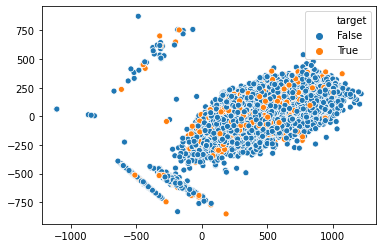

In [35]:
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=imbalanced.target);

In [36]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(imbalanced.iloc[:, :-1], imbalanced.target)

In [37]:
imbalanced_pca_smote = pca.transform(X_smote)

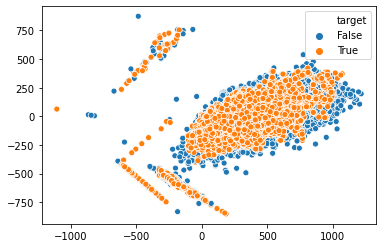

In [38]:
sns.scatterplot(x=imbalanced_pca_smote[:, 0], y=imbalanced_pca_smote[:, 1], hue=y_smote);

In [40]:
# balanceado
sum(y_smote == True)/sum(y_smote == False)

1.0

## Aplicando modelo logistic regression

In [41]:
X = X_data
y = y_data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [43]:
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3928
           1       0.92      0.97      0.94       603

    accuracy                           0.98      4531
   macro avg       0.96      0.98      0.97      4531
weighted avg       0.98      0.98      0.98      4531



## Predict

In [47]:
NU_INSCRICAO = test['NU_INSCRICAO'].copy()

In [48]:
# buscando as features utilizadas para o treino
exploracao['nomes'].tolist()

['IN_TREINEIRO',
 'NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q047']

In [49]:
feat_trained = ['NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
'TP_STATUS_REDACAO'              ,
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q047']

In [50]:
test = test[feat_trained]

In [51]:
test.isna().sum()

NU_INSCRICAO            0
NU_IDADE                0
TP_SEXO                 0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ESCOLA               0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
TP_PRESENCA_MT          0
TP_STATUS_REDACAO    1170
NU_NOTA_CN           1112
NU_NOTA_CH           1112
NU_NOTA_LC           1170
NU_NOTA_COMP1        1170
NU_NOTA_COMP2        1170
NU_NOTA_COMP3        1170
NU_NOTA_COMP4        1170
NU_NOTA_COMP5        1170
NU_NOTA_REDACAO      1170
Q001                    0
Q002                    0
Q006                    0
Q024                    0
Q025                    0
Q026                    0
Q047                    0
dtype: int64

In [52]:
# setando zero para alunos que faltaram a prova
test['NU_NOTA_CN'].loc[test.TP_PRESENCA_CN == 0] = 0
test['NU_NOTA_CH'].loc[test.TP_PRESENCA_CH == 0] = 0
test['NU_NOTA_LC'].loc[test.TP_PRESENCA_LC == 0] = 0
test['NU_NOTA_REDACAO'].loc[test.TP_STATUS_REDACAO ==4] = 0
test['NU_NOTA_COMP1'].loc[test.TP_STATUS_REDACAO==4] = 0
test['NU_NOTA_COMP2'].loc[test.TP_STATUS_REDACAO==4] = 0
test['NU_NOTA_COMP3'].loc[test.TP_STATUS_REDACAO==4] = 0
test['NU_NOTA_COMP4'].loc[test.TP_STATUS_REDACAO==4] = 0
test['NU_NOTA_COMP5'].loc[test.TP_STATUS_REDACAO==4] = 0

In [53]:
# preenchendo com zero os faltantes
test = test.fillna(0)

In [54]:
# esta features não estava no treino, só foi importada para fazer a imputação dos faltantes NU_NOTA_REDACAO
test.drop("TP_STATUS_REDACAO",axis=1,inplace=True)

In [55]:
# get dummies da mesma lista utilizada para treino
a = pd.get_dummies(test, columns=lista_colunas, drop_first=True, prefix=lista_colunas)

In [56]:
# concatena a nova lista de features e dropa a antiga
test = pd.concat([test.drop(lista_colunas, axis=1), a], axis=1)

In [57]:
test.drop('NU_INSCRICAO',axis=1,inplace=True)

In [58]:
# conferindo se há a mesma quantidade de features no teste e treino
test.shape

(4570, 76)